In [7]:
import os
import numpy as np
import pickle
import h5py
import scipy.signal as sps
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from feature_editing import FeatureDesigner
from dataset_parsing import DataInfo, DataProducer


In [8]:
data_info = DataInfo()
designer = FeatureDesigner(data_info)

steps_sample = data_info.label_data_fs * data_info.segment_duration


idx = 2
repo_path = "/home/tbj/repos/wesad-tools"
data_path = os.path.join(repo_path, "data/WESAD/S2/S2.pkl")
print(data_path)
with open(data_path, 'rb') as f:
    d = pickle.load(f, encoding='latin1')


/home/tbj/repos/wesad-tools/data/WESAD/S2/S2.pkl


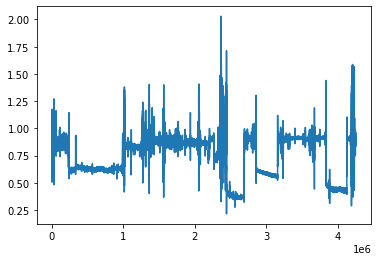

In [9]:

v = d['signal']['chest']['ACC'][:,0]
plt.plot(v)


In [59]:
def f(v):
    y = np.fft.fft(v)
    x = np.fft.fftfreq(len(v), 1/700)
    arr = np.vstack((x,y)).T
    return next((abs(x[0]) for x in np.sort(arr,1) if (abs(x[0]) > 0) ), 0) 
vec = pd.Series(v[:]).rolling(3500, min_periods=1).apply(f)
# mean_filt = pd.Series(data).rolling(win_sz, min_periods=1).mean()
plt.plot([i for i in vec[:5] ])


KeyboardInterrupt: 

In [19]:
np.sort(vec)

array([0.00000000e+00, 4.13143800e-02, 5.50853291e-02, ...,
       2.94902377e+00, 2.95834060e+00, 3.50000000e+02])